1. 以15分钟线为例, 从量价还有强度的角度去切入, 各个指标的相关性, 高相关性的指标分配不同的权重

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.api as sm
# import tushare as ts
import QUANTAXIS as QA
import talib as ta
import datetime, time


In [3]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.style.use('ggplot')

### 先拿到15分钟线的数据

In [4]:
code = '002366'
start = '2010-01-01'
end = datetime.datetime.today().strftime('%Y-%m-%d')

In [28]:
end_daily = (datetime.datetime.today() - datetime.timedelta(1)).strftime('%Y-%m-%d')

In [36]:
data_daily = QA.QA_fetch_get_stock_day('tdx', code, start, end, if_fq='00')
atr_daily = QA.talib_indicators.ATR(data_daily)

In [43]:
atr_daily.index = pd.DatetimeIndex(atr_daily.index)

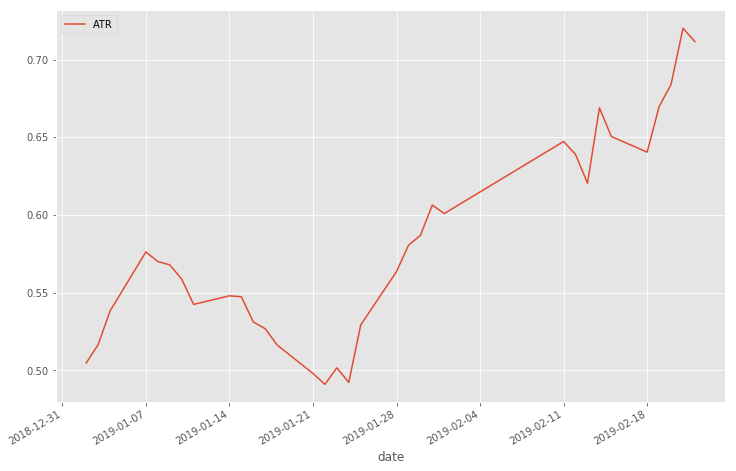

In [46]:
atr_daily['2019'].plot();

In [50]:
data_15min = QA.QA_fetch_get_stock_min('tdx', code, start, end, level='15min')
data_15min.index = pd.DatetimeIndex(data_15min.index)
atr_15min = QA.talib_indicators.ATR(data_15min)
# atr_15min.index = pd.DatetimeIndex(atr_15min.index)

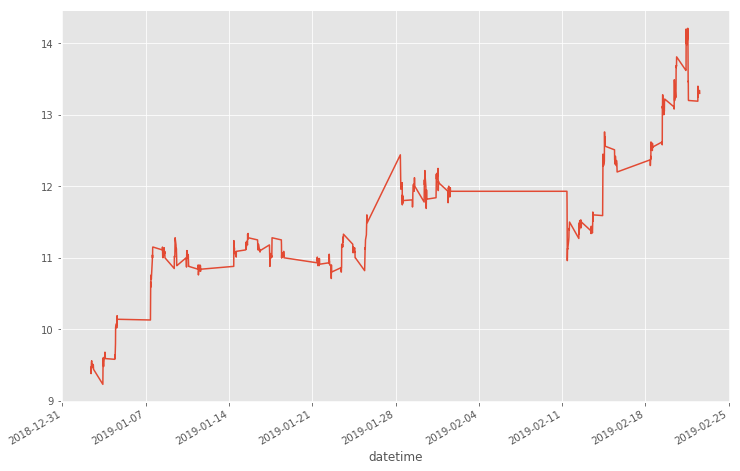

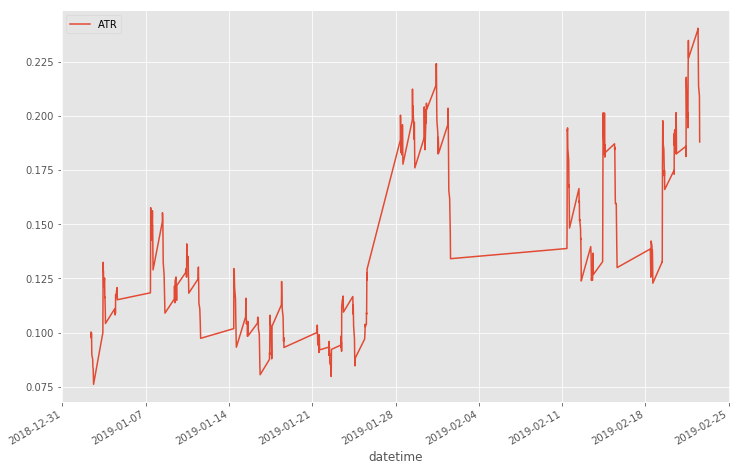

In [52]:
data_15min.close['2019'].plot();
atr_15min['2019'].plot();

In [17]:
atr_15min.iloc[-2][0]

0.2404847630500086

In [18]:
58594 * 0.01 / atr_15min.iloc[-2][0] // 100

24.0

In [20]:
12.77 / 13.25

0.9637735849056603

In [7]:
data_15min = QA.QA_fetch_stock_min_adv(code, start, end, frequence='15min')

In [8]:
data_15min.data.head()

,,open,high,low,close,volume,amount,type
datetime,code,,,,,,,
2016-03-21 09:45:00,002366,50.00,50.00,48.65,48.8,1744900.0,85716128.0,15min
2016-03-21 10:00:00,002366,48.79,49.07,48.38,48.4,934900.0,45594224.0,15min
2016-03-21 10:15:00,002366,48.38,48.66,48.00,48.3,620000.0,29945104.0,15min
2016-03-21 10:30:00,002366,48.30,48.30,47.70,48.0,519100.0,24938640.0,15min
2016-03-21 10:45:00,002366,48.18,48.78,48.18,48.5,376100.0,18231968.0,15min


In [9]:
data_15min.data.tail()

,,open,high,low,close,volume,amount,type
datetime,code,,,,,,,
2019-01-25 14:00:00,002366,11.46,11.79,11.45,11.58,3222200.0,37441488.0,15min
2019-01-25 14:15:00,002366,11.55,11.66,11.50,11.60,1370000.0,15864368.0,15min
2019-01-25 14:30:00,002366,11.59,11.60,11.52,11.52,1130600.0,13060336.0,15min
2019-01-25 14:45:00,002366,11.54,11.65,11.45,11.58,1451900.0,16717376.0,15min
2019-01-25 15:00:00,002366,11.58,11.61,11.48,11.49,1663500.0,19159072.0,15min


In [11]:
writer = pd.ExcelWriter('data/data_min.xlsx')
data_15min.data.to_excel(writer)
writer.save()